In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from libra_toolbox.neutron_detection.diamond.process_data import (
    main,
    get_avg_neutron_rate,
)

## Fabricate data

In [2]:
total_time_s = 200  # s
total_time_ps = total_time_s * 1e12  # s to ps

# peak 1
nb_counts_peak1 = int(2e4)
size_peak1 = nb_counts_peak1
time_values_out_peak1 = np.random.rand(size_peak1) * total_time_ps
mean_energy_peak1 = 4e6
std_energy_peak1 = 0.5e6
energy_values_peak1 = np.random.normal(mean_energy_peak1, std_energy_peak1, size_peak1)

# peak 2
nb_counts_peak2 = int(7e4)
size_peak2 = nb_counts_peak2
time_values_out_peak2 = np.random.rand(size_peak2) * total_time_ps
mean_energy_peak2 = 14e6
std_energy_peak2 = 1e6

energy_values_peak2 = np.random.normal(mean_energy_peak2, std_energy_peak2, size_peak2)

time_values_out = np.concatenate((time_values_out_peak1, time_values_out_peak2))
energy_values = np.concatenate((energy_values_peak1, energy_values_peak2))

# remove values where t between 100 and 150 s
mask = (time_values_out > 100e12) & (time_values_out < 150e12)
time_values_out = time_values_out[~mask]
energy_values = energy_values[~mask]

# write data to files
# make data directory if it doesn't exist
import os

if not os.path.exists("data"):
    os.makedirs("data")

np.savetxt(
    "data/data.csv",
    np.column_stack((time_values_out, energy_values)),
    delimiter=",",
)

## Read and process data

In [3]:
res_peak1 = main(
    directory="data",
    bin_time=2,
    energy_peak_min=mean_energy_peak1 - std_energy_peak1 * 2,
    energy_peak_max=mean_energy_peak1 + std_energy_peak1 * 2,
    time_column=0,
    energy_column=1,
    delimiter=",",
)

res_peak2 = main(
    directory="data",
    bin_time=2,
    energy_peak_min=mean_energy_peak2 - std_energy_peak2 * 2,
    energy_peak_max=mean_energy_peak2 + std_energy_peak2 * 2,
    time_column=0,
    energy_column=1,
    delimiter=",",
)


In [4]:
res_avg = get_avg_neutron_rate(res_peak1["time_values"], 0, 100)

## Plot results

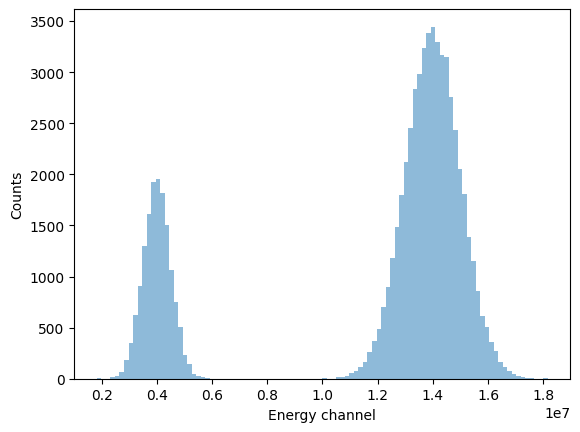

In [5]:
plt.hist(res_peak1["energy_values"], bins=100, alpha=0.5)
plt.xlabel("Energy channel")
plt.ylabel("Counts")
plt.show()

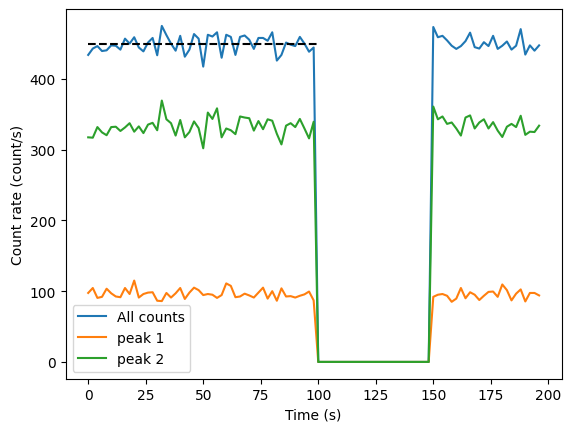

In [6]:
plt.plot(
    res_peak1["all_count_rate_bins"][:-1],
    res_peak1["all_count_rates"],
    label="All counts",
)
plt.plot(
    res_peak1["peak_count_rate_bins"][:-1],
    res_peak1["peak_count_rates"],
    label="peak 1",
)
plt.plot(
    res_peak2["peak_count_rate_bins"][:-1],
    res_peak2["peak_count_rates"],
    label="peak 2",
)

plt.hlines(res_avg["count rate"], 0, 100, color="black", linestyle="--")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Count rate (count/s)")
plt.show()